In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# cargar dados final
df = pd.read_csv('out.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20250 entries, 0 to 20249
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20250 non-null  int64  
 1   date/hour                20250 non-null  object 
 2   current_speed            20250 non-null  float64
 3   free_flow_speed          20250 non-null  float64
 4   description              20250 non-null  float64
 5   incident_category_desc   20250 non-null  float64
 6   magnitude_of_delay_desc  20250 non-null  float64
 7   length_in_meters         20250 non-null  float64
 8   delay_in_seconds         20250 non-null  float64
 9   humidity                 20250 non-null  float64
 10  clouds                   20250 non-null  float64
 11  current_luminosity       20250 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.9+ MB


In [4]:
df.shape

(20250, 12)

In [5]:
df.describe()

,Unnamed: 0,current_speed,free_flow_speed,description,incident_category_desc,magnitude_of_delay_desc,length_in_meters,delay_in_seconds,humidity,clouds,current_luminosity
count,20250.000000,20250.000000,20250.000000,20250.000000,20250.000000,20250.000000,2.025000e+04,20250.000000,20250.000000,20250.000000,20250.000000
mean,10794.584593,21.757333,23.357630,4.486469,1.749827,3.611605,7.895505e+03,39.487457,81.863259,35.318716,0.555654
std,6314.048414,3.527962,1.805469,1.388431,0.661501,1.067116,3.908964e+05,147.452014,17.186086,34.928788,0.574611
min,0.000000,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,19.000000,0.000000,0.000000
25%,5297.250000,21.000000,22.000000,5.000000,2.000000,4.000000,0.000000e+00,0.000000,72.000000,0.000000,0.000000
50%,10778.500000,23.000000,23.000000,5.000000,2.000000,4.000000,0.000000e+00,0.000000,87.000000,20.000000,1.000000
75%,16164.750000,24.000000,24.000000,5.000000,2.000000,4.000000,0.000000e+00,0.000000,93.000000,75.000000,1.000000
max,22034.000000,28.000000,30.000000,5.000000,2.000000,4.000000,1.967023e+07,4007.000000,100.000000,100.000000,2.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'date/hour', 'current_speed', 'free_flow_speed',
       'description', 'incident_category_desc', 'magnitude_of_delay_desc',
       'length_in_meters', 'delay_in_seconds', 'humidity', 'clouds',
       'current_luminosity'],
      dtype='object')

In [7]:
## boscar valores nulos:

droping_list_all=[]
for j in range(0,11):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[]

In [8]:
df.isnull().sum()

Unnamed: 0                 0
date/hour                  0
current_speed              0
free_flow_speed            0
description                0
incident_category_desc     0
magnitude_of_delay_desc    0
length_in_meters           0
delay_in_seconds           0
humidity                   0
clouds                     0
current_luminosity         0
dtype: int64

In [9]:
from datetime import datetime
d = []
for x in df['date/hour']:
  date = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
  date = date.replace(second=0, microsecond=0) # eliminar os segundos e millisegundos
  d.append(date)

In [10]:
df["date/hour"] = d

In [11]:
df.set_index('date/hour')

,Unnamed: 0,current_speed,free_flow_speed,description,incident_category_desc,magnitude_of_delay_desc,length_in_meters,delay_in_seconds,humidity,clouds,current_luminosity
date/hour,,,,,,,,,,,
2019-01-15 19:05:00,0,20.0,20.0,0.0,0.0,0.0,1744.0,156.0,93.0,12.0,0.0
2019-01-15 19:25:00,1,20.0,20.0,5.0,2.0,4.0,0.0,0.0,93.0,12.0,0.0
2019-01-15 19:45:00,2,20.0,20.0,5.0,2.0,4.0,0.0,0.0,93.0,12.0,0.0
2019-01-15 20:05:00,3,20.0,20.0,5.0,2.0,4.0,0.0,0.0,93.0,20.0,0.0
2019-01-15 20:25:00,4,20.0,20.0,5.0,2.0,4.0,0.0,0.0,93.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:25:00,22030,28.0,28.0,5.0,2.0,4.0,0.0,0.0,100.0,20.0,0.0
2019-12-31 22:45:00,22031,28.0,28.0,5.0,2.0,4.0,0.0,0.0,100.0,20.0,0.0
2019-12-31 23:05:00,22032,28.0,28.0,5.0,2.0,4.0,0.0,0.0,100.0,40.0,0.0


In [12]:
# ficar index date Time y cada 1 horra
df = df.set_index('date/hour').resample('1H').pad()

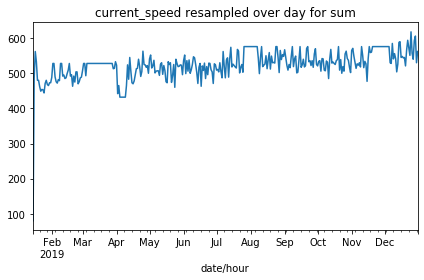

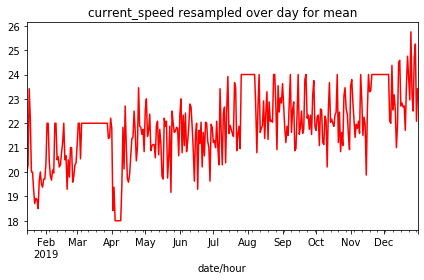

In [13]:
df.current_speed.resample('D').sum().plot(title='current_speed resampled over day for sum')  
plt.tight_layout()
plt.show()   

df.current_speed.resample('D').mean().plot(title='current_speed resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

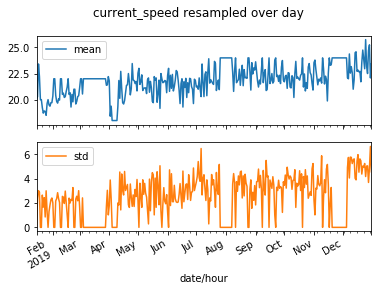

In [14]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.current_speed.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='current_speed resampled over day')
plt.show()

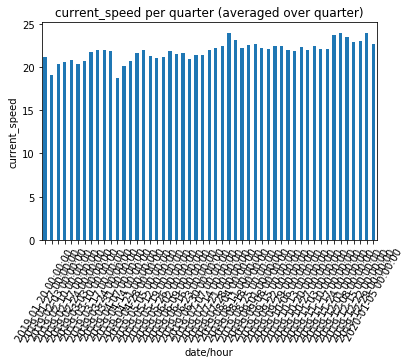

In [22]:
## current_speed' resampled over weeks
df['current_speed'].resample('W').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('current_speed')
plt.title('current_speed per quarter (averaged over quarter)')
plt.show()

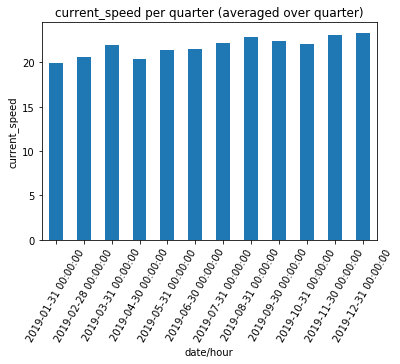

In [21]:
## current_speed' resampled over months
df['current_speed'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('current_speed')
plt.title('current_speed per quarter (averaged over quarter)')
plt.show()

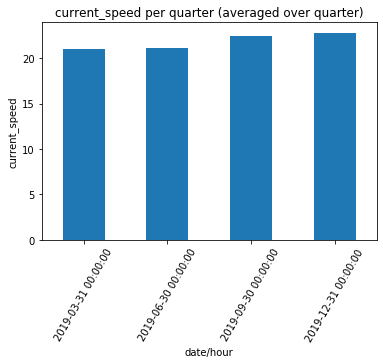

In [16]:
## Mean of current_speed resampled over quarter
df['current_speed'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('current_speed')
plt.title('current_speed per quarter (averaged over quarter)')
plt.show()

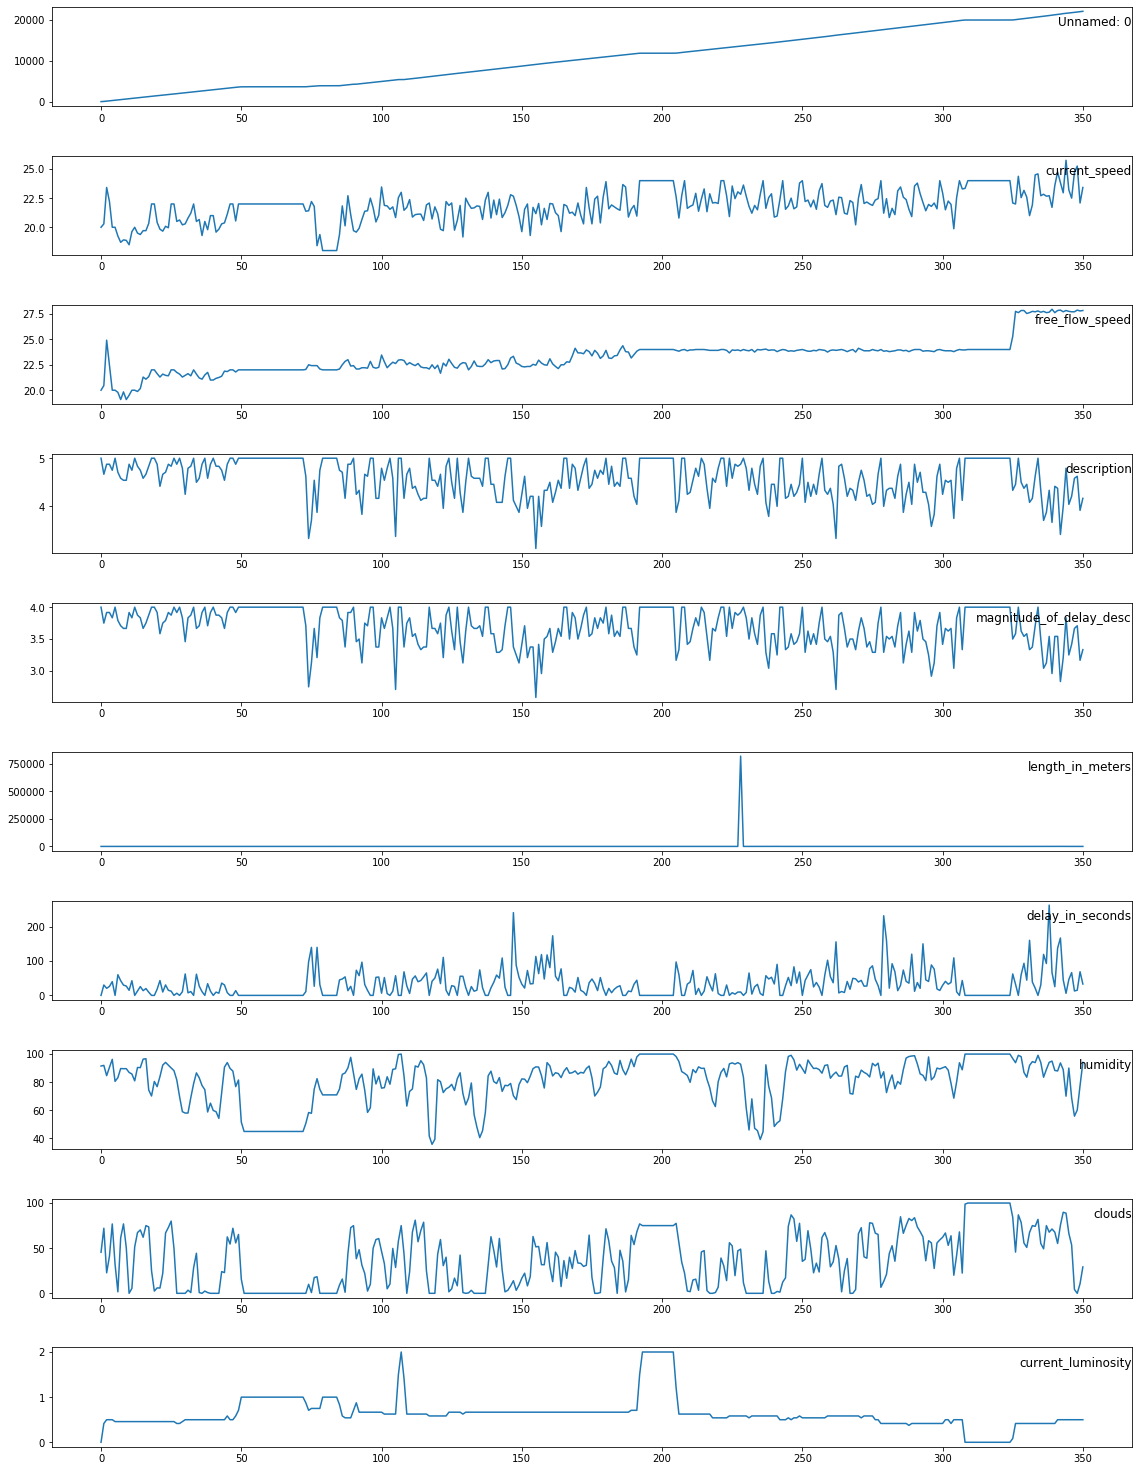

In [17]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6,7,8,9,10]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))

for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.5)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1
plt.show()


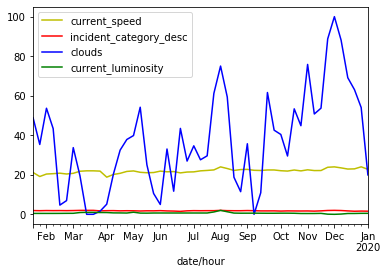

In [18]:
## resampling over week and computing mean
df.current_speed.resample('W').mean().plot(color='y', legend=True)
df.incident_category_desc.resample('W').mean().plot(color='r', legend=True)
df.clouds.resample('W').mean().plot(color='b', legend=True)
df.current_luminosity.resample('W').mean().plot(color='g', legend=True)
plt.show()


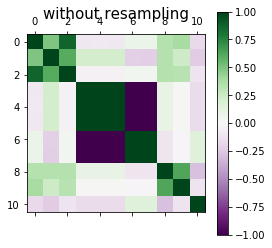

In [19]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

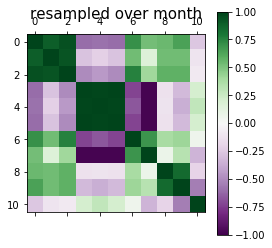

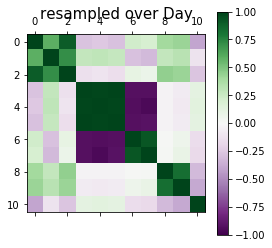

In [20]:
# Correlations of mean of features resampled over months


plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('D').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over Day', size=15)
plt.colorbar()
plt.show()

In [30]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

In [31]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(8405, 11)

In [32]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
#reframed.drop(reframed.columns[[12,13,14,15,17,18,19,20,21]], axis=1, inplace=True)
reframed.drop(reframed.columns[[11,12,13,14,15,16,17,18,19,20]], axis=1, inplace=True)

print(reframed)

      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
2     -1.000000   0.384615       -0.8        1.0        1.0        1.0   
3     -0.999728   0.384615       -0.8        1.0        1.0        1.0   
4     -0.999455   0.384615       -0.8        1.0        1.0        1.0   
5     -0.999183   0.384615       -0.8        1.0        1.0        1.0   
6     -0.998911   0.384615       -0.8        1.0        1.0        1.0   
...         ...        ...        ...        ...        ...        ...   
8400   0.998457   0.153846        0.6       -1.0       -1.0       -1.0   
8401   0.998911   0.307692        0.8        1.0        1.0        1.0   
8402   0.999183   1.000000        0.8        1.0        1.0        1.0   
8403   0.999455   1.000000        0.8        1.0        1.0        1.0   
8404   0.999728   1.000000        0.8        1.0        1.0        1.0   

      var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var11(t)  
2     -1.000000  -1.000000   0.827160

In [33]:
# split into train and test sets
timesteps = 504
values = reframed.values
train = values[:timesteps, :]
test = values[timesteps:, :]

In [34]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [35]:
# Fazer reshape do input para array 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(504, 1, 11) (504,) (7899, 1, 11) (7899,)


Train on 504 samples, validate on 7899 samples
Epoch 1/100
 - 1s - loss: 0.5705 - val_loss: 0.4122
Epoch 2/100
 - 0s - loss: 0.3952 - val_loss: 0.3749
Epoch 3/100
 - 0s - loss: 0.3369 - val_loss: 0.3731
Epoch 4/100
 - 0s - loss: 0.3331 - val_loss: 0.3587
Epoch 5/100
 - 0s - loss: 0.3150 - val_loss: 0.3374
Epoch 6/100
 - 0s - loss: 0.3056 - val_loss: 0.3213
Epoch 7/100
 - 0s - loss: 0.2953 - val_loss: 0.3080
Epoch 8/100
 - 0s - loss: 0.2884 - val_loss: 0.2958
Epoch 9/100
 - 0s - loss: 0.2721 - val_loss: 0.2839
Epoch 10/100
 - 0s - loss: 0.2616 - val_loss: 0.2721
Epoch 11/100
 - 0s - loss: 0.2574 - val_loss: 0.2608
Epoch 12/100
 - 0s - loss: 0.2484 - val_loss: 0.2507
Epoch 13/100
 - 0s - loss: 0.2383 - val_loss: 0.2411
Epoch 14/100
 - 0s - loss: 0.2339 - val_loss: 0.2326
Epoch 15/100
 - 0s - loss: 0.2280 - val_loss: 0.2256
Epoch 16/100
 - 0s - loss: 0.2252 - val_loss: 0.2197
Epoch 17/100
 - 0s - loss: 0.2204 - val_loss: 0.2143
Epoch 18/100
 - 0s - loss: 0.2189 - val_loss: 0.2107
Epoch 19

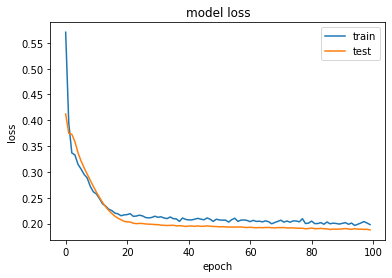

In [37]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [38]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 11))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -10:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -10:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4773.187
